Use the dataset in assignment 4 (Abalone Dataset).

- Load the data from data file.
- Explore the shape of dataset.
- Summarize the properties in the training dataset. Write findings from column description.
- Check the dataset for any missing values, impute the missing values and also print out the correlation matrix.
- Split data into train, test sets.
- Predict ring class as classification problem using Naive Bayes and Decision Tree Classifier.
- Calculate the accuracy score of the two models for both training and test data set.
- Display confusion matrix.
- Display the classification report.
- Compare the two models based on accuracy score and classification report and give your reasoning on which is the best model in this case.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
columns = ['sex', 'length', 'diameter', 'height', 'weight_a', 'weight_b', 'weight_c', 'weight_d', 'rings']
df = pd.read_csv('../data/abalone_data.csv', names=columns)
df.head()

,sex,length,diameter,height,weight_a,weight_b,weight_c,weight_d,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex         4177 non-null object
length      4177 non-null float64
diameter    4177 non-null float64
height      4177 non-null float64
weight_a    4177 non-null float64
weight_b    4177 non-null float64
weight_c    4177 non-null float64
weight_d    4177 non-null float64
rings       4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,length,diameter,height,weight_a,weight_b,weight_c,weight_d,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


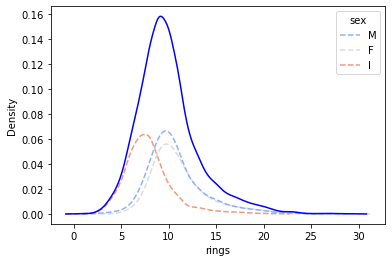

In [5]:
sb.kdeplot(data=df, x='rings', hue='sex', palette='coolwarm', linestyle='dashed')
sb.kdeplot(data=df, x='rings', label='rings', color='blue')

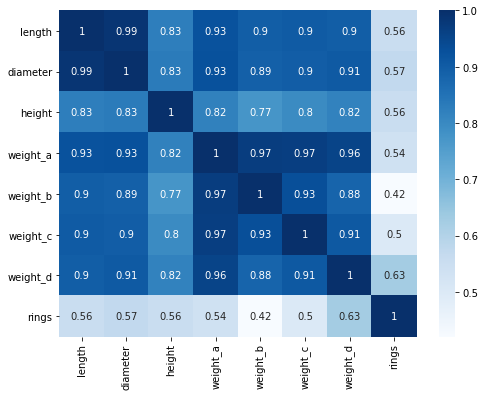

In [6]:
plt.figure(figsize=(8, 6))
sb.heatmap(df.corr(), annot=True, cmap='Blues')

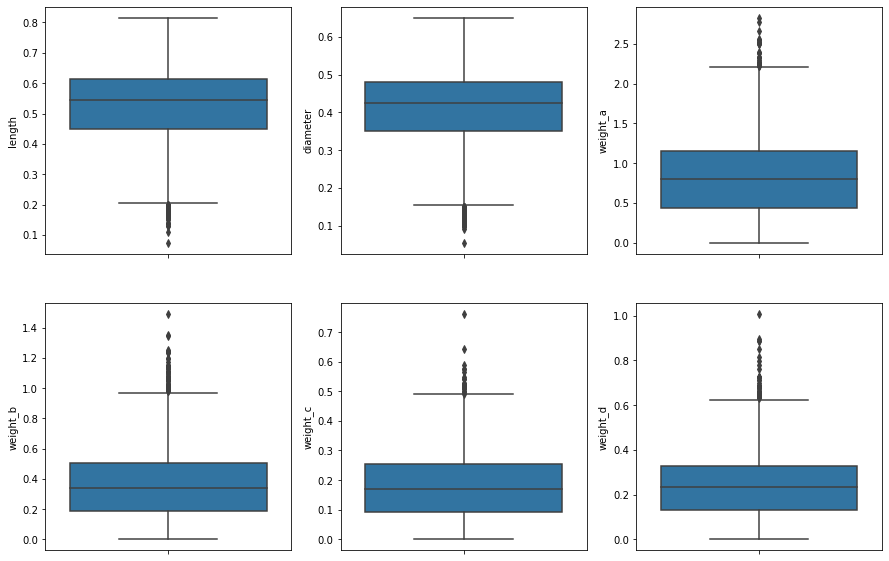

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10)) 
sb.boxplot(y='length', data=df, ax=ax[0][0])
sb.boxplot(y='diameter', data=df, ax=ax[0][1])
sb.boxplot(y='weight_a', data=df, ax=ax[0][2])
sb.boxplot(y='weight_b', data=df, ax=ax[1][0])
sb.boxplot(y='weight_c', data=df, ax=ax[1][1])
sb.boxplot(y='weight_d', data=df, ax=ax[1][2])

In [8]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)
IQR = Q2 - Q1

IQR

length      0.1650
diameter    0.1300
height      0.0500
weight_a    0.7115
weight_b    0.3160
weight_c    0.1595
weight_d    0.1990
rings       3.0000
dtype: float64

In [9]:
for column in df.drop(columns=['sex']): 
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.75)
    iqr = q2 - q1
    print(column)
    print('\tIQR: ', iqr)
    # removing Outliers from each of the columns
    print('\tDropped row', df[(df[column] < (q1 - 1.5 * iqr)) | (df[column] > (q2 + 1.5 * iqr))][column].count())
    df.drop(df[(df[column] < (q1 - 1.5 * iqr)) | (df[column] > (q2 + 1.5 * iqr))].index, inplace=True)

length
	IQR:  0.16499999999999998
	Dropped row 49
diameter
	IQR:  0.13
	Dropped row 12
height
	IQR:  0.05
	Dropped row 8
weight_a
	IQR:  0.7051249999999999
	Dropped row 28
weight_b
	IQR:  0.30949999999999994
	Dropped row 25
weight_c
	IQR:  0.154
	Dropped row 14
weight_d
	IQR:  0.19049999999999995
	Dropped row 28
rings
	IQR:  3.0
	Dropped row 240


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 0 to 4176
Data columns (total 9 columns):
sex         3773 non-null object
length      3773 non-null float64
diameter    3773 non-null float64
height      3773 non-null float64
weight_a    3773 non-null float64
weight_b    3773 non-null float64
weight_c    3773 non-null float64
weight_d    3773 non-null float64
rings       3773 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 294.8+ KB


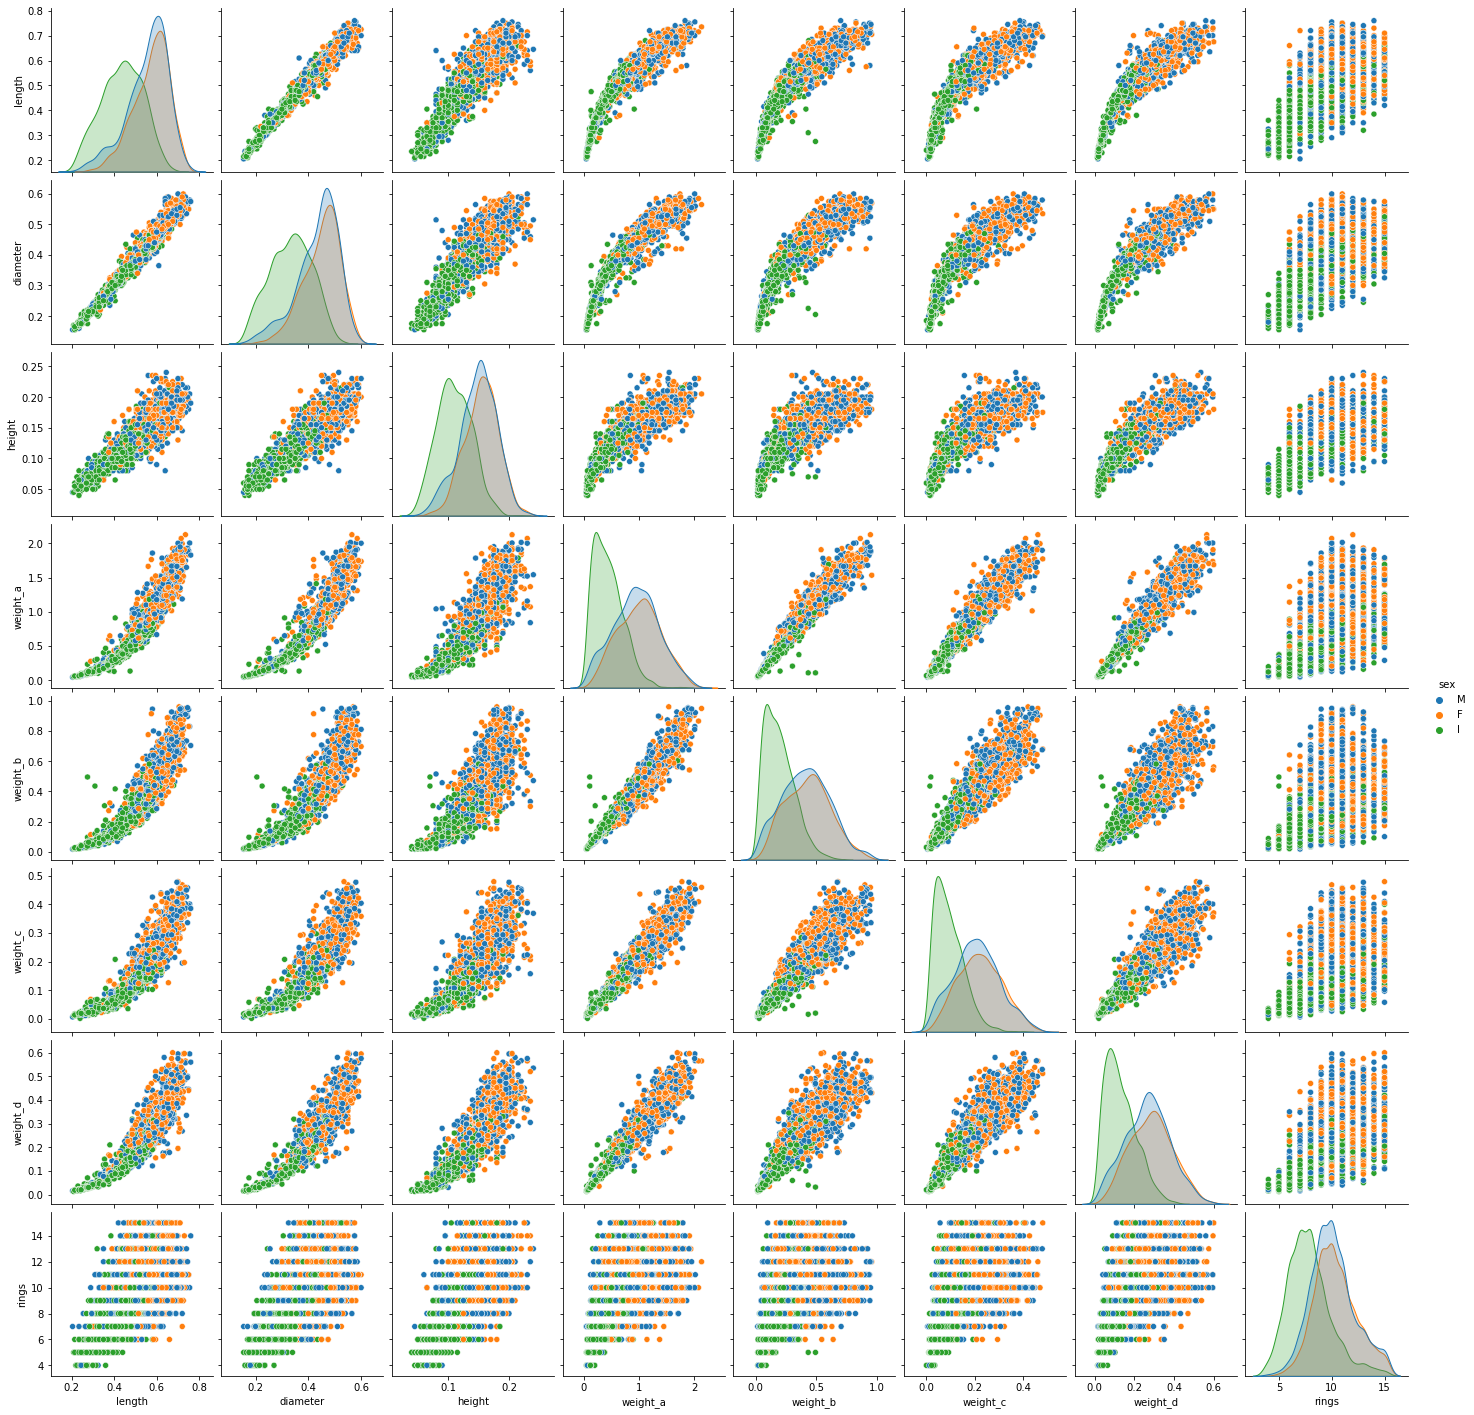

In [12]:
sb.pairplot(data=df, hue='sex')

#### Naive Bayes Classifier

In [13]:
x = df[['length', 'diameter', 'height', 'weight_a', 'weight_b', 'weight_c', 'weight_d']]
y = df['rings']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=73)

In [14]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [15]:
nb_model.score(x_train, y_train)

0.2508903838543728

In [16]:
nb_model.score(x_test, y_test)

0.25441412520064205

In [17]:
nb_test = nb_model.predict(x_test)
nb_test

array([ 9, 11,  9, ...,  8,  7,  8])

Residual Plot


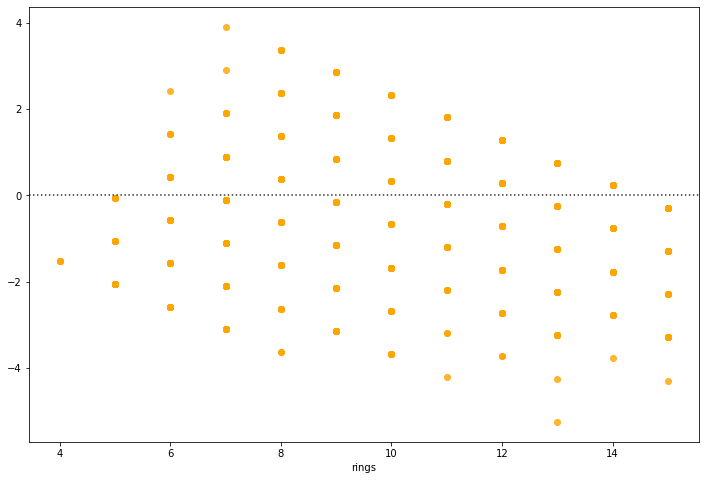

In [18]:
print('Residual Plot')
fig = plt.figure(figsize=(12, 8))
sb.residplot(x=y_test, y=nb_test, color='orange')

Text(0.5, 87.0, 'Predicted')

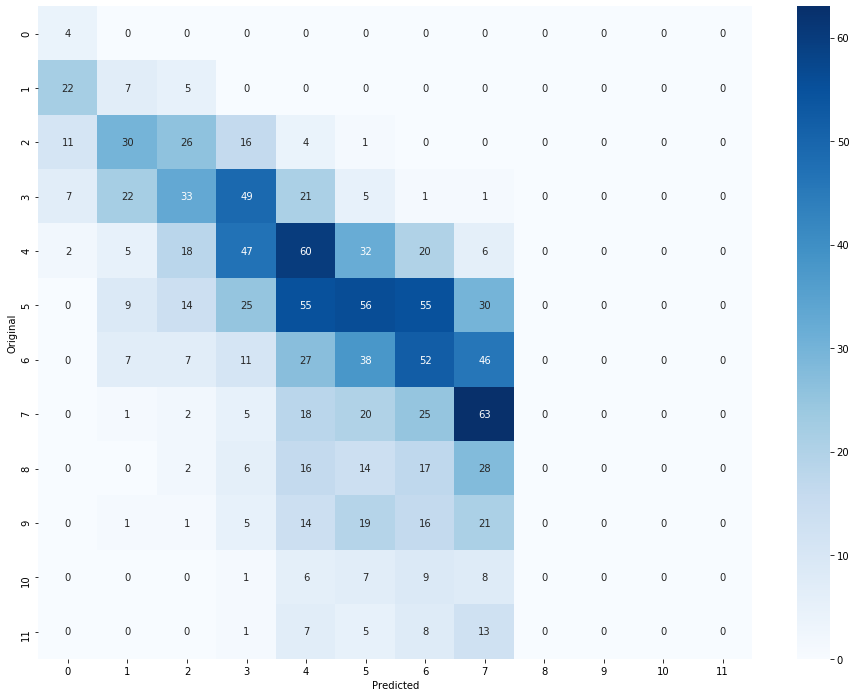

In [19]:
plt.figure(figsize=(16, 12))
sb.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, nb_test)), cmap='Blues', annot=True, fmt='d')
plt.ylabel('Original')
plt.xlabel('Predicted')

In [20]:
print(metrics.classification_report(y_test, nb_test, zero_division=False))

              precision    recall  f1-score   support

           4       0.09      1.00      0.16         4
           5       0.09      0.21      0.12        34
           6       0.24      0.30      0.27        88
           7       0.30      0.35      0.32       139
           8       0.26      0.32      0.29       190
           9       0.28      0.23      0.25       244
          10       0.26      0.28      0.27       188
          11       0.29      0.47      0.36       134
          12       0.00      0.00      0.00        83
          13       0.00      0.00      0.00        77
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        34

    accuracy                           0.25      1246
   macro avg       0.15      0.26      0.17      1246
weighted avg       0.22      0.25      0.23      1246



#### Decision Tree Classification

In [21]:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
dt_model.score(x_train, y_train)

0.29362880886426596

In [23]:
dt_model.score(x_test, y_test)

0.2825040128410915

In [24]:
test_prediction = dt_model.predict(x_test)
test_prediction

array([ 9, 11, 10, ...,  8,  7,  8])

Residual Plot


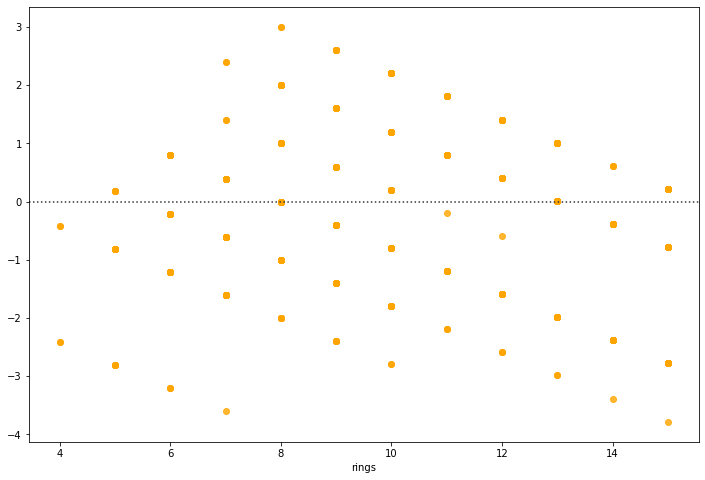

In [25]:
print("Residual Plot")
fig = plt.figure(figsize=(12, 8))

sb.residplot(x=y_test, y=test_prediction, color='orange')

Text(0.5, 87.0, 'Predicted')

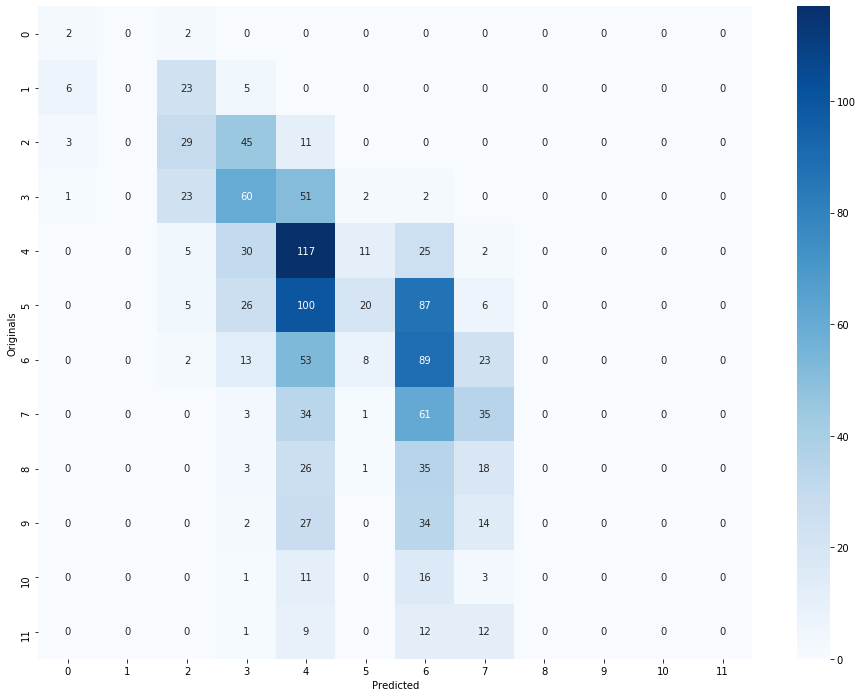

In [26]:
plt.figure(figsize=(16, 12))
sb.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, test_prediction)), cmap='Blues', annot=True, fmt='d')
plt.ylabel('Originals')
plt.xlabel('Predicted')

In [30]:
print(metrics.classification_report(y_test, test_prediction, zero_division=False))

              precision    recall  f1-score   support

           4       0.17      0.50      0.25         4
           5       0.00      0.00      0.00        34
           6       0.33      0.33      0.33        88
           7       0.32      0.43      0.37       139
           8       0.27      0.62      0.37       190
           9       0.47      0.08      0.14       244
          10       0.25      0.47      0.32       188
          11       0.31      0.26      0.28       134
          12       0.00      0.00      0.00        83
          13       0.00      0.00      0.00        77
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        34

    accuracy                           0.28      1246
   macro avg       0.17      0.22      0.17      1246
weighted avg       0.26      0.28      0.23      1246

